## NI-VSM Uloha #2

    (1b) Z obou datových souborů načtěte texty k analýze. Pro každý text zvlášť odhadněte základní charakteristiky délek slov, tj. střední hodnotu a rozptyl. Graficky znázorněte rozdělení délek slov.
    (1b) Pro každý text zvlášť odhadněte pravděpodobnosti písmen (symbolů mimo mezery), které se v textech vyskytují. Výsledné pravděpodobnosti graficky znázorněte.
    (1.5b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení délek slov nezávisí na tom, o který jde text. Určete také p-hodnotu testu.
    (1.5b) Na hladině významnosti 5% otestujte hypotézu, že se střední délky slov v obou textech rovnají. Určete také p-hodnotu testu.
    (1b) Na hladině významnosti 5% otestujte hypotézu, že rozdělení písmen nezávisí na tom, o který jde text. Určete také p-hodnotu testu.

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import scipy.stats as sp

from collections import Counter
from itertools import chain
from matplotlib.ticker import PercentFormatter

Najprv si vypočítame parametre.

In [3]:
K=16
L=len("Jantosovic")
X=((K*L*23) % (20)) + 1
Y=((X + ((K*5 + L*7) % (19))) % (20)) + 1

A pomocou parametrov načítame súbory:

In [4]:
path_to_x="data/"+str(X).zfill(3)+".txt"
path_to_y="data/"+str(Y).zfill(3)+".txt"

with open(path_to_x) as file:
    x_file = file.readlines()[1:]
with open(path_to_y) as file:
    y_file = file.readlines()[1:]

Následneme spočítame dĺžky slov v načítanom texte pre X a Y súbor a spočítame strednú hodnotu a rozptyl.

In [5]:
x_words=list(map(len, x_file[0].split(' '))) # [0] je taky hack - vyuzivame ze vieme ze je to na jednom riadku
y_words=list(map(len, y_file[0].split(' ')))
print('Stredna hodnota pre subor',str(X).zfill(3),'je' ,stats.mean(x_words),'a rozptyl je', stats.variance(x_words) )
print('Stredna hodnota pre subor',str(Y).zfill(3),'je' ,stats.mean(y_words),'a rozptyl je', stats.variance(y_words))

Stredna hodnota pre subor 001 je 4.3825 a rozptyl je 4.139643452877398
Stredna hodnota pre subor 019 je 4.643589743589744 a rozptyl je 6.830091465420807


Zjavne je rozptyl vyšší u datasetu Y, skúsime premietnúť na histogram a "uvidieť" prečo:

14


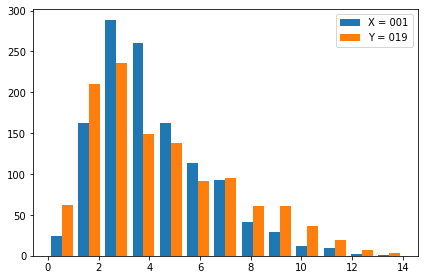

In [22]:
max_word_length=max(x_words+y_words)
bins=np.linspace(0, max_word_length,max_word_length)
plt.hist([x_words, y_words], bins=bins, label=['X = '+str(X).zfill(3), 'Y = '+str(Y).zfill(3)])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Početnosť je u datasetu X vyššia v rozmedzí 3-6 oproti datasetu Y, naopak dataset Y prekonáva v početnosti dataset X mimo interval 3-6, hodnoty sú teda zjavne viac rozptýlené.


Následne sa pokúsime znázorniť pravdepodobnosť výskytu jednotlivých písmen bez medzery - vypracovanie je rovnaké ako u domácej úlohy #1, len v datasetoch ignorujeme medzeru.

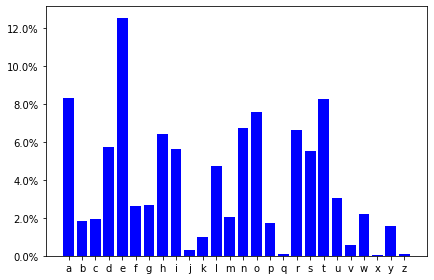

In [7]:
x_counts=Counter(chain.from_iterable(x_file))
x_counts=sorted(x_counts.items())[1:]

x_chars, x_data = zip(*x_counts)
x_total=sum(x_data)

plt.bar(x_chars, [i/x_total for i in x_data], color='b')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

A znovu zopakujeme pre Y dataset.

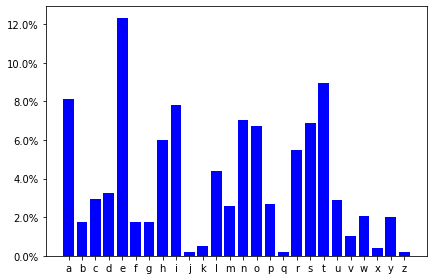

In [8]:
y_counts=Counter(chain.from_iterable(y_file))
y_counts=sorted(y_counts.items())[1:]

y_chars, y_data = zip(*y_counts)
y_total=sum(y_data)

plt.bar(y_chars, [i/y_total for i in y_data], color='b')
plt.tight_layout()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Následne sa pokúsime overiť že rozdelenie dlžok slov nezávisí na tom o ktorý text ide. Nápoveda hovorí o teste nezávislosti v kontigenčnej tabuľke tak si jednu pokúsime zostaviť.

Takže aby sme to sformulovali:

H0: Rozdelenie dĺžok slov je nezávislé na texte.

HA: Rozdelenie dĺžok slov nieje nezávislé na texte.

In [75]:
x_word_count=Counter(x_words)
y_word_count=Counter(y_words)
print(x_word_count)
print(y_word_count)

Counter({3: 288, 4: 261, 5: 163, 2: 163, 6: 113, 7: 93, 8: 41, 9: 29, 1: 24, 10: 12, 11: 10, 12: 2, 14: 1})
Counter({3: 236, 2: 210, 4: 149, 5: 138, 7: 95, 6: 92, 1: 62, 9: 61, 8: 61, 10: 37, 11: 19, 12: 7, 13: 2, 14: 1})


Bohužiaľ datasety nemajú rovnakú dĺžku a navyše podmienka na početnosť nieje splnená takže to musíme trochu učesať.

In [117]:
merged_cells = 3 # tu asi nema zmysel nieco vymyslat, proste mergnem posledne 4 stlpce do 1
x_merged = 0
y_merged = 0
contingency_table = np.zeros((max_word_length,2))
for i in range (1,max_word_length+1):
    contingency_table[i-1,:] = (x_word_count[i], y_word_count[i])
for i in range(max_word_length+1-merged_cells,max_word_length+1):
    x_merged+=contingency_table[i-1][0]
    y_merged+=contingency_table[i-1][1]
contingency_table[max_word_length-merged_cells-1][0]+=x_merged;
contingency_table[max_word_length-merged_cells-1][1]+=y_merged;
contingency_table=contingency_table[:-merged_cells, :]
print(contingency_table)

[[ 24.  62.]
 [163. 210.]
 [288. 236.]
 [261. 149.]
 [163. 138.]
 [113.  92.]
 [ 93.  95.]
 [ 41.  61.]
 [ 29.  61.]
 [ 12.  37.]
 [ 13.  29.]]


No a v tejto chvíli máme dáta pripravené a využijeme funkciu:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
ktorá nám vráti chi^2 aj p-hodnotu.

In [119]:
chi2, p, dof, ex = sp.chi2_contingency(contingency_table, correction=False)
print('Hodnota chi^2 je: ',chi2,' P-hodnota: ', p)

Hodnota chi^2 je:  96.50268745006089  P-hodnota:  2.7244030007996367e-16


No a vzhľadom na to že platí:

In [120]:
alfa = 0.05
if p < alfa:
    print('p < alfa , H0 je zamietnuté')
else:
    print('p >= alfa , H0 nieje zamietnuté')

p < alfa , H0 je zamietnuté


Pokúsime sa teraz otestovať hypotézu že sa stredné dĺžky slov rovnajú v oboch textoch.

H0: Stredné dĺžky slov sa rovnajú v oboch textoch.

HA: Stredné dĺžky slov sa nerovnajú v oboch textoch.

Odrazíme sa od toho že vieme že sa rozptyly nerovnajú ( z bodu 1 tejto úlohy.. ) a použijeme teda dvojvýberový test o zhode stredných hodnot pre prípad kedy sa rozptyly nerovnajú.

In [135]:
Sd=np.sqrt((stats.variance(x_words)/len(x_words)) +(stats.variance(y_words)/len(y_words)))
Nd=np.power(Sd,4) / ( ( np.power((stats.variance(x_words)/len(x_words)),2) / (len(x_words)-1)) + ( np.power((stats.variance(y_words)/len(y_words)),2) / (len(y_words)-1)) )
T=(stats.mean(x_words) - stats.mean(y_words))/Sd
alfa = 0.05
t_alfahalf_nd=sp.t.ppf(alfa/2,Nd) # https://stackoverflow.com/questions/19339305/python-function-to-get-the-t-statistic
print('Testová štatistika T: ', T)
print('Kritický obor: ', t_alfahalf_nd)
if (abs(T) > t_alfahalf_nd):
    print('Abs(T) > t, H0 zamietam')
else:
    print('Abs(T) <= t, H0 nezamietam')
    
p = 2*(sp.t.sf(abs(T),df=Nd)) # https://stackoverflow.com/questions/17559897/python-p-value-from-t-statistic
print('P-hodnota testu je: ', p)

Testová štatistika T:  -2.70921218074837
Kritický obor:  -1.9610392973846893
Abs(T) > t, H0 zamietam
P-hodnota testu je:  0.006796432529862903


A v poslednej úlohe si zopakujeme test nezávislosti v kontingenčnej tabuľke, tento raz ale nad datasetom početnosti písmen.

H0: Rozdelenie písmen je nezávislé na texte.
    
HA: Rozdelenie písmen nieje nezávislé na texte.

Vytvoríme teda kontingenčnú tabuľku, tento raz sú datasety v poriadku, oba používajú 26 písmen ale podmienka na početnosť je nesplnená u datasetu X kde máme písmeno x len 1-krát. V Kontingenčnej tabuľke teda zlúčim písmeno x a z.

In [155]:
z_index = 0
contingency_table = np.zeros((len(x_data),2))
for i in range(0,len(x_data)):
    if(x_chars[i]=='x'):
        z_index = i
    if(x_chars[i]=='z'):
        contingency_table[z_index,:] += (x_data[i], y_data[i])
    else:
        contingency_table[i,:] = (x_data[i], y_data[i])
contingency_table=contingency_table[:-1,:]
chi2, p, dof, ex = sp.chi2_contingency(contingency_table, correction=False)
print('Hodnota chi^2 je: ',chi2,' P-hodnota: ', p)

Hodnota chi^2 je:  153.49344649141807  P-hodnota:  7.412131726730008e-21


No a vzhľadom na to že platí:

In [156]:
alfa = 0.05
if p < alfa:
    print('p < alfa , H0 je zamietnuté')
else:
    print('p >= alfa , H0 nieje zamietnuté')

p < alfa , H0 je zamietnuté
